In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

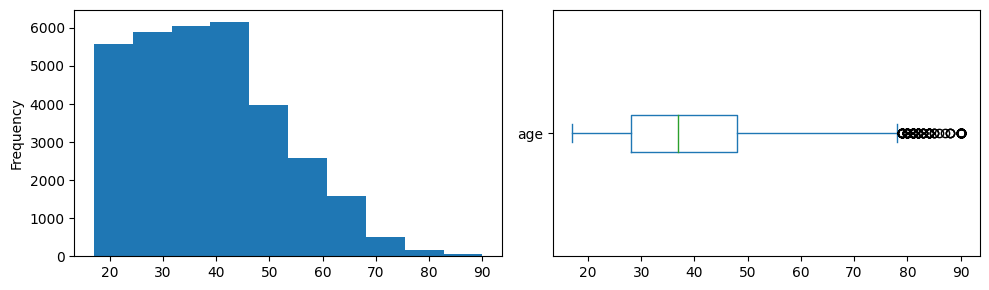

<Figure size 640x480 with 0 Axes>

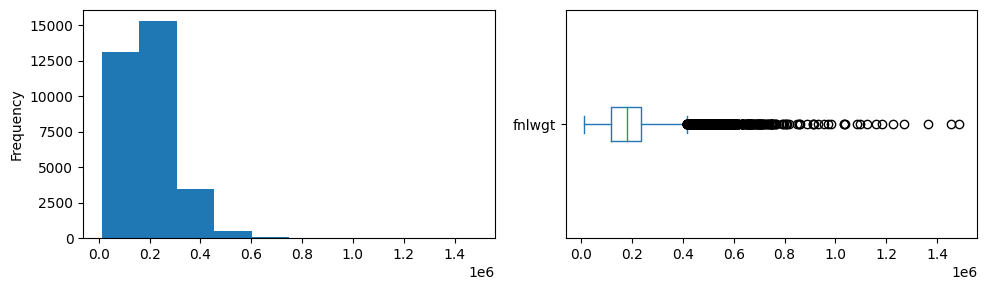

<Figure size 640x480 with 0 Axes>

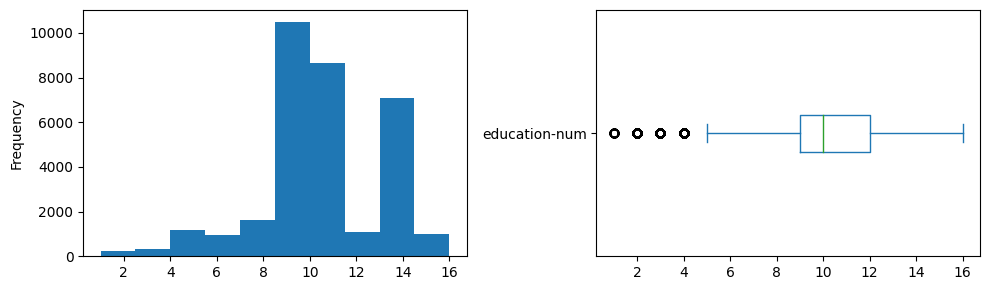

<Figure size 640x480 with 0 Axes>

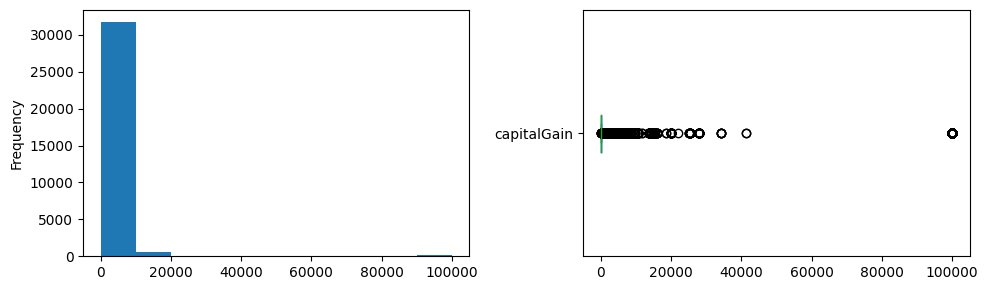

<Figure size 640x480 with 0 Axes>

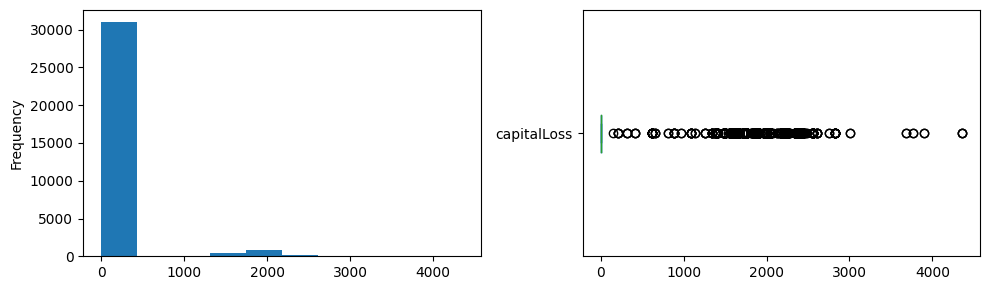

<Figure size 640x480 with 0 Axes>

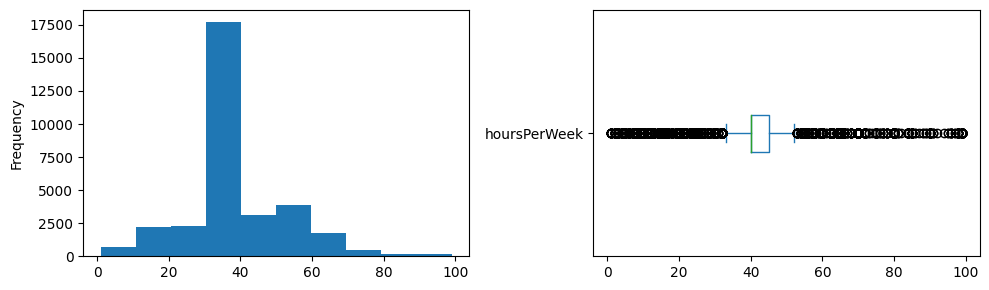

<Figure size 640x480 with 0 Axes>

In [2]:
adult_df= pd.read_csv('adult.csv')
numerical_attributes = ['age','fnlwgt','education-num',
                        'capitalGain','capitalLoss','hoursPerWeek']
for att in numerical_attributes:
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    adult_df[att].plot.hist()
    plt.subplot(1,2,2)
    adult_df[att].plot.box(vert=False)
    plt.tight_layout()
    plt.show()
    plt.savefig('{}test.png'.format([att]), dpi=600)

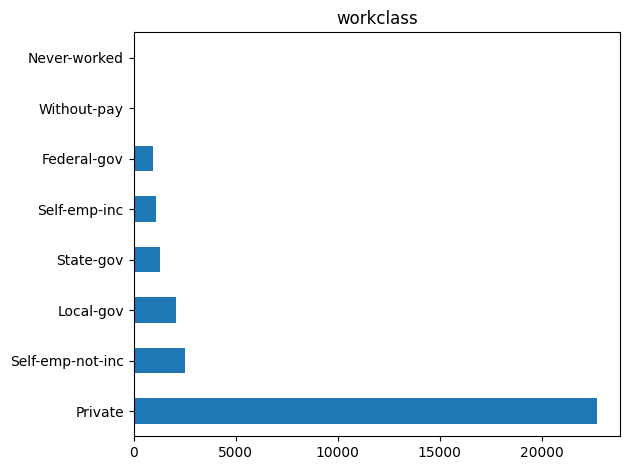

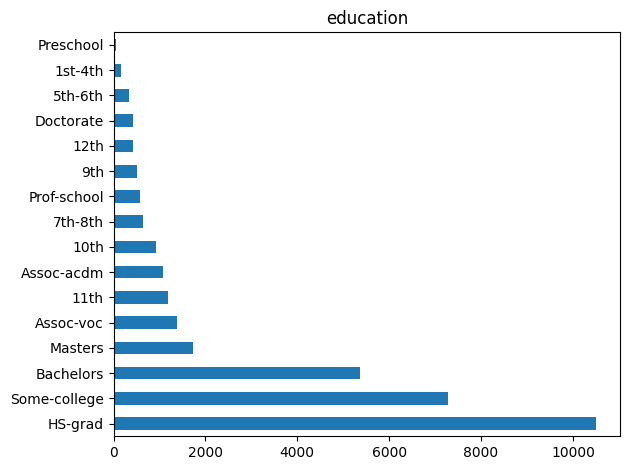

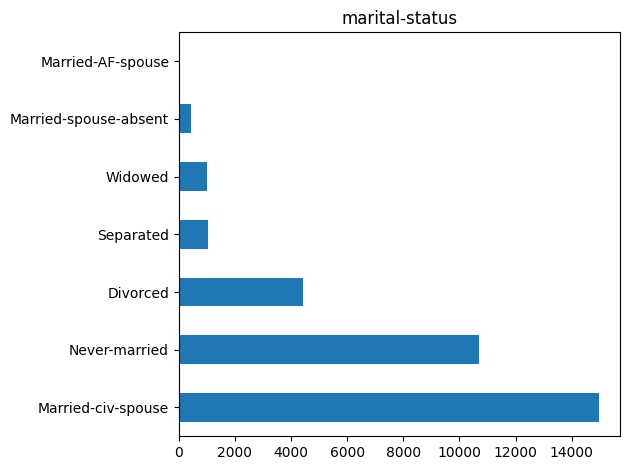

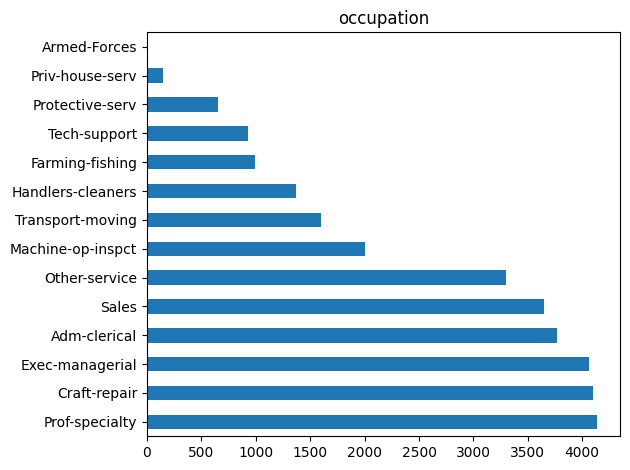

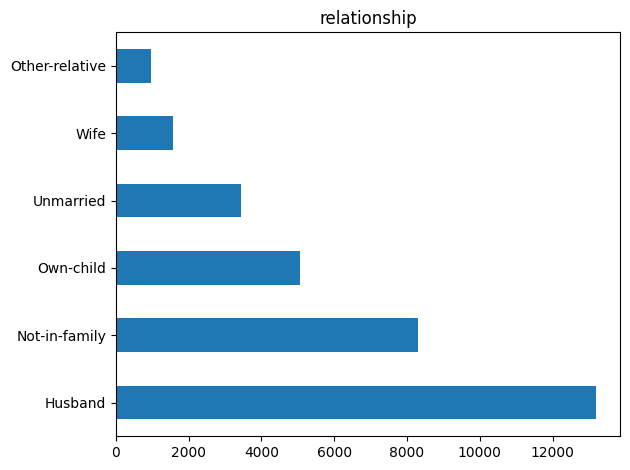

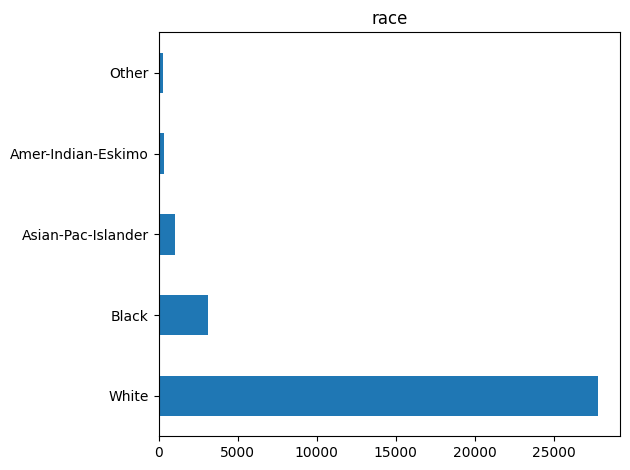

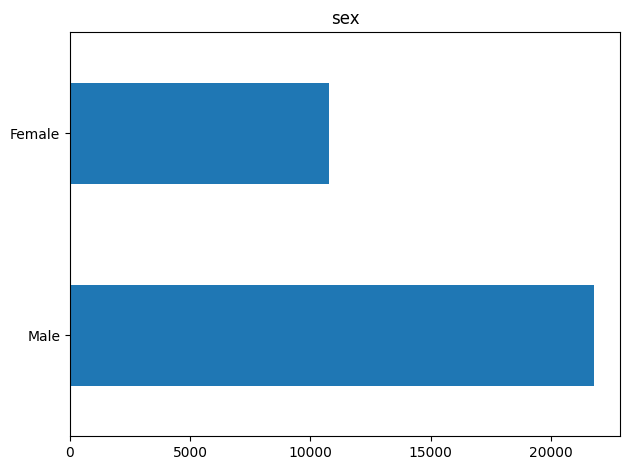

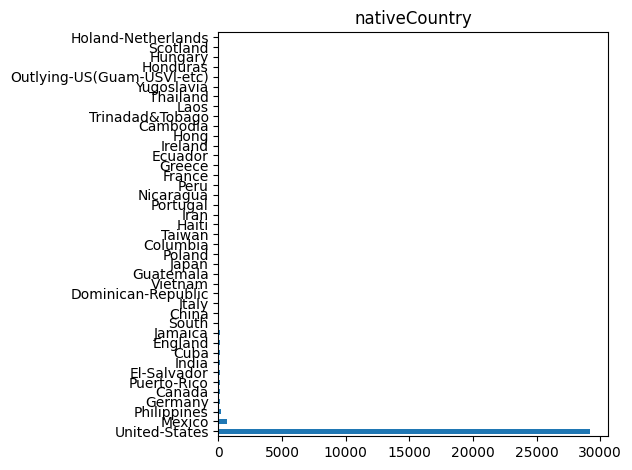

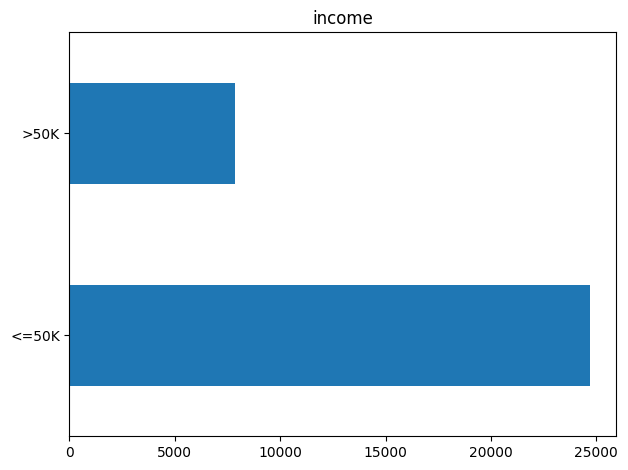

In [3]:
categorical_attributes = ['workclass','education','marital-status','occupation',
                          'relationship','race','sex','nativeCountry','income']
for att in categorical_attributes:
    adult_df[att].value_counts().plot.barh()
    plt.title(att)
    plt.tight_layout()
    plt.savefig('{}test.png'.format([att]), dpi=600)
    plt.show()

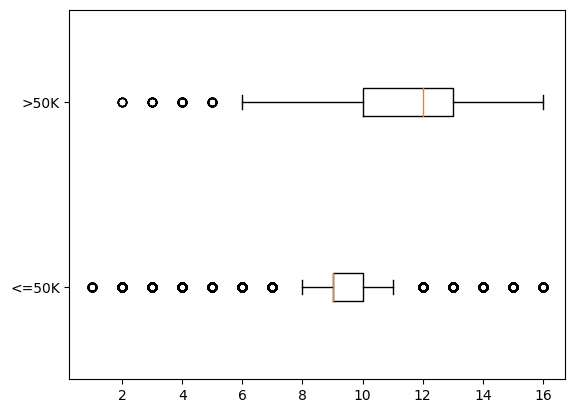

In [4]:
income_possibilities = adult_df['income'].unique()
box_sr = pd.Series('',index = income_possibilities)
for poss in income_possibilities:
    BM = adult_df.income == poss
    box_sr[poss] = adult_df[BM]['education-num']
    
plt.boxplot(box_sr, vert=False)
plt.yticks([1,2], income_possibilities)
plt.show()

In [5]:
income_possibilities

array(['<=50K', '>50K'], dtype=object)

In [6]:
box_sr

<=50K    0        13
1        13
2         9
3         ...
>50K     7         9
8        14
9        13
10       1...
dtype: object

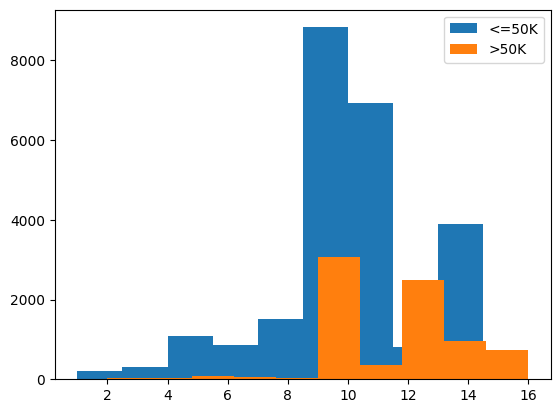

In [7]:
income_possibilities = adult_df['income'].unique()
for poss in income_possibilities:
    BM = adult_df.income == poss
    plt.hist(adult_df[BM]['education-num'], label=poss, histtype='bar')
plt.legend()
plt.show()

In [8]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


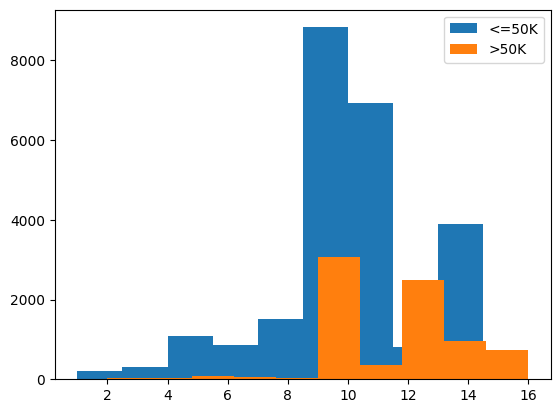

In [11]:
income_possibilities = adult_df['income'].unique()
for poss in income_possibilities:
    BM = adult_df['income']==poss
    plt.hist(adult_df[BM]['education-num'],
             label=poss, histtype='bar')    
plt.legend()
plt.show()

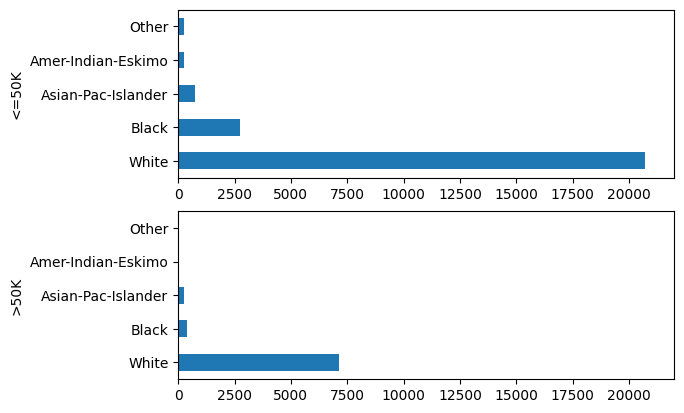

In [12]:
income_possibilities = adult_df['income'].unique()
for i, poss in enumerate(income_possibilities):
    plt.subplot(2,1,i+1)
    BM = adult_df['income']==poss
    adult_df[BM]['race'].value_counts().plot.barh()
    plt.xlim([0,22000])
    plt.ylabel(poss)

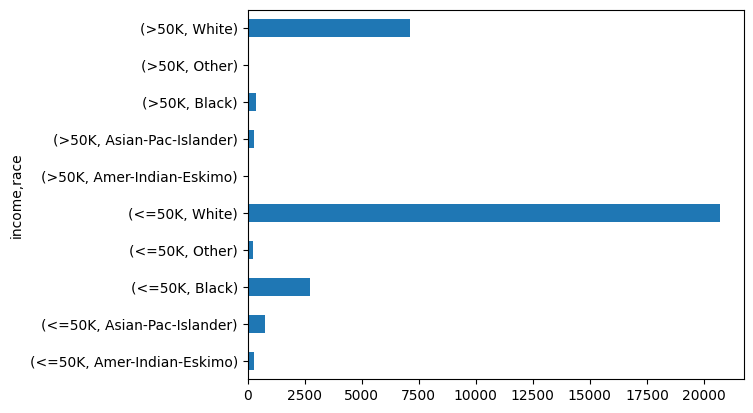

In [13]:
adult_df.groupby(['income','race']).size().plot.barh()
plt.show()

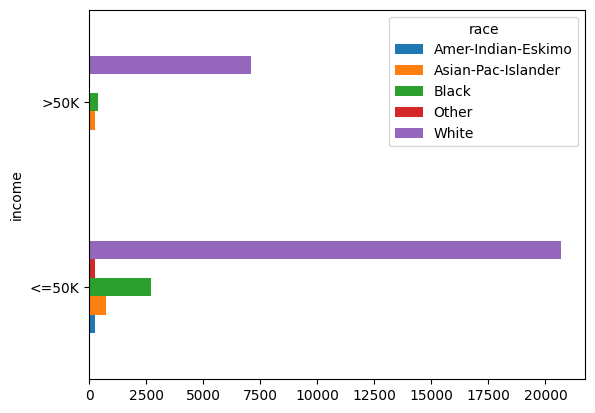

In [14]:
adult_df.groupby(['income','race']).size().unstack().plot.barh()
plt.show()

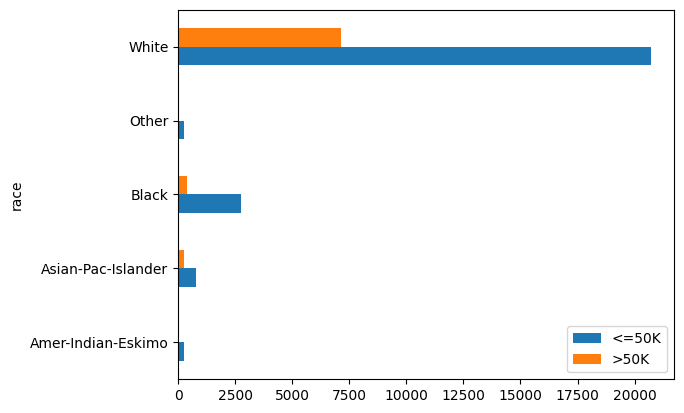

In [15]:
adult_df.groupby(['race','income']).size().unstack().plot.barh()
# the loc value can designate which corner legend is placed
plt.legend(loc=4)
plt.show()

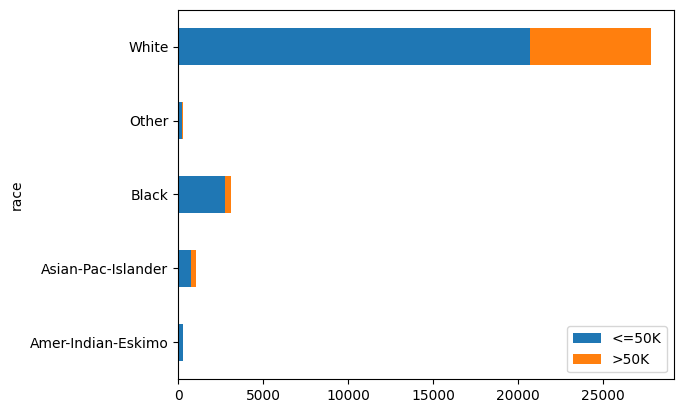

In [16]:
adult_df.groupby(['race','income']).size().unstack().plot.barh(stacked=True)
plt.legend(loc=4)
plt.show()

In [17]:
import seaborn as sns
uni_df = pd.read_csv('Universities_imputed_reduced.csv')

In [18]:
uni_df.head()

,College Name,State,Public/Private,num_appli_rec,num_appl_accepted,num_new_stud_enrolled,in-state tuition,out-of-state tuition,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,Private,193,146,55,7560,7560,76,11.9,15
1,University of Alaska at Fairbanks,AK,Public,1852,1427,928,1742,5226,67,10.0,60
2,University of Alaska Southeast,AK,Public,146,117,89,1742,5226,39,9.5,39
3,University of Alaska at Anchorage,AK,Public,2065,1598,1162,1742,5226,48,13.7,60
4,Alabama Agri. & Mech. Univ.,AL,Public,2817,1920,984,1700,3400,53,14.3,40


In [19]:
uni_df.shape

(1302, 11)

In [20]:
uni_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   College Name           1302 non-null   object 
 1   State                  1302 non-null   object 
 2   Public/Private         1302 non-null   object 
 3   num_appli_rec          1302 non-null   int64  
 4   num_appl_accepted      1302 non-null   int64  
 5   num_new_stud_enrolled  1302 non-null   int64  
 6   in-state tuition       1302 non-null   int64  
 7   out-of-state tuition   1302 non-null   int64  
 8   % fac. w/PHD           1302 non-null   int64  
 9   stud./fac. ratio       1302 non-null   float64
 10  Graduation rate        1302 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 112.0+ KB


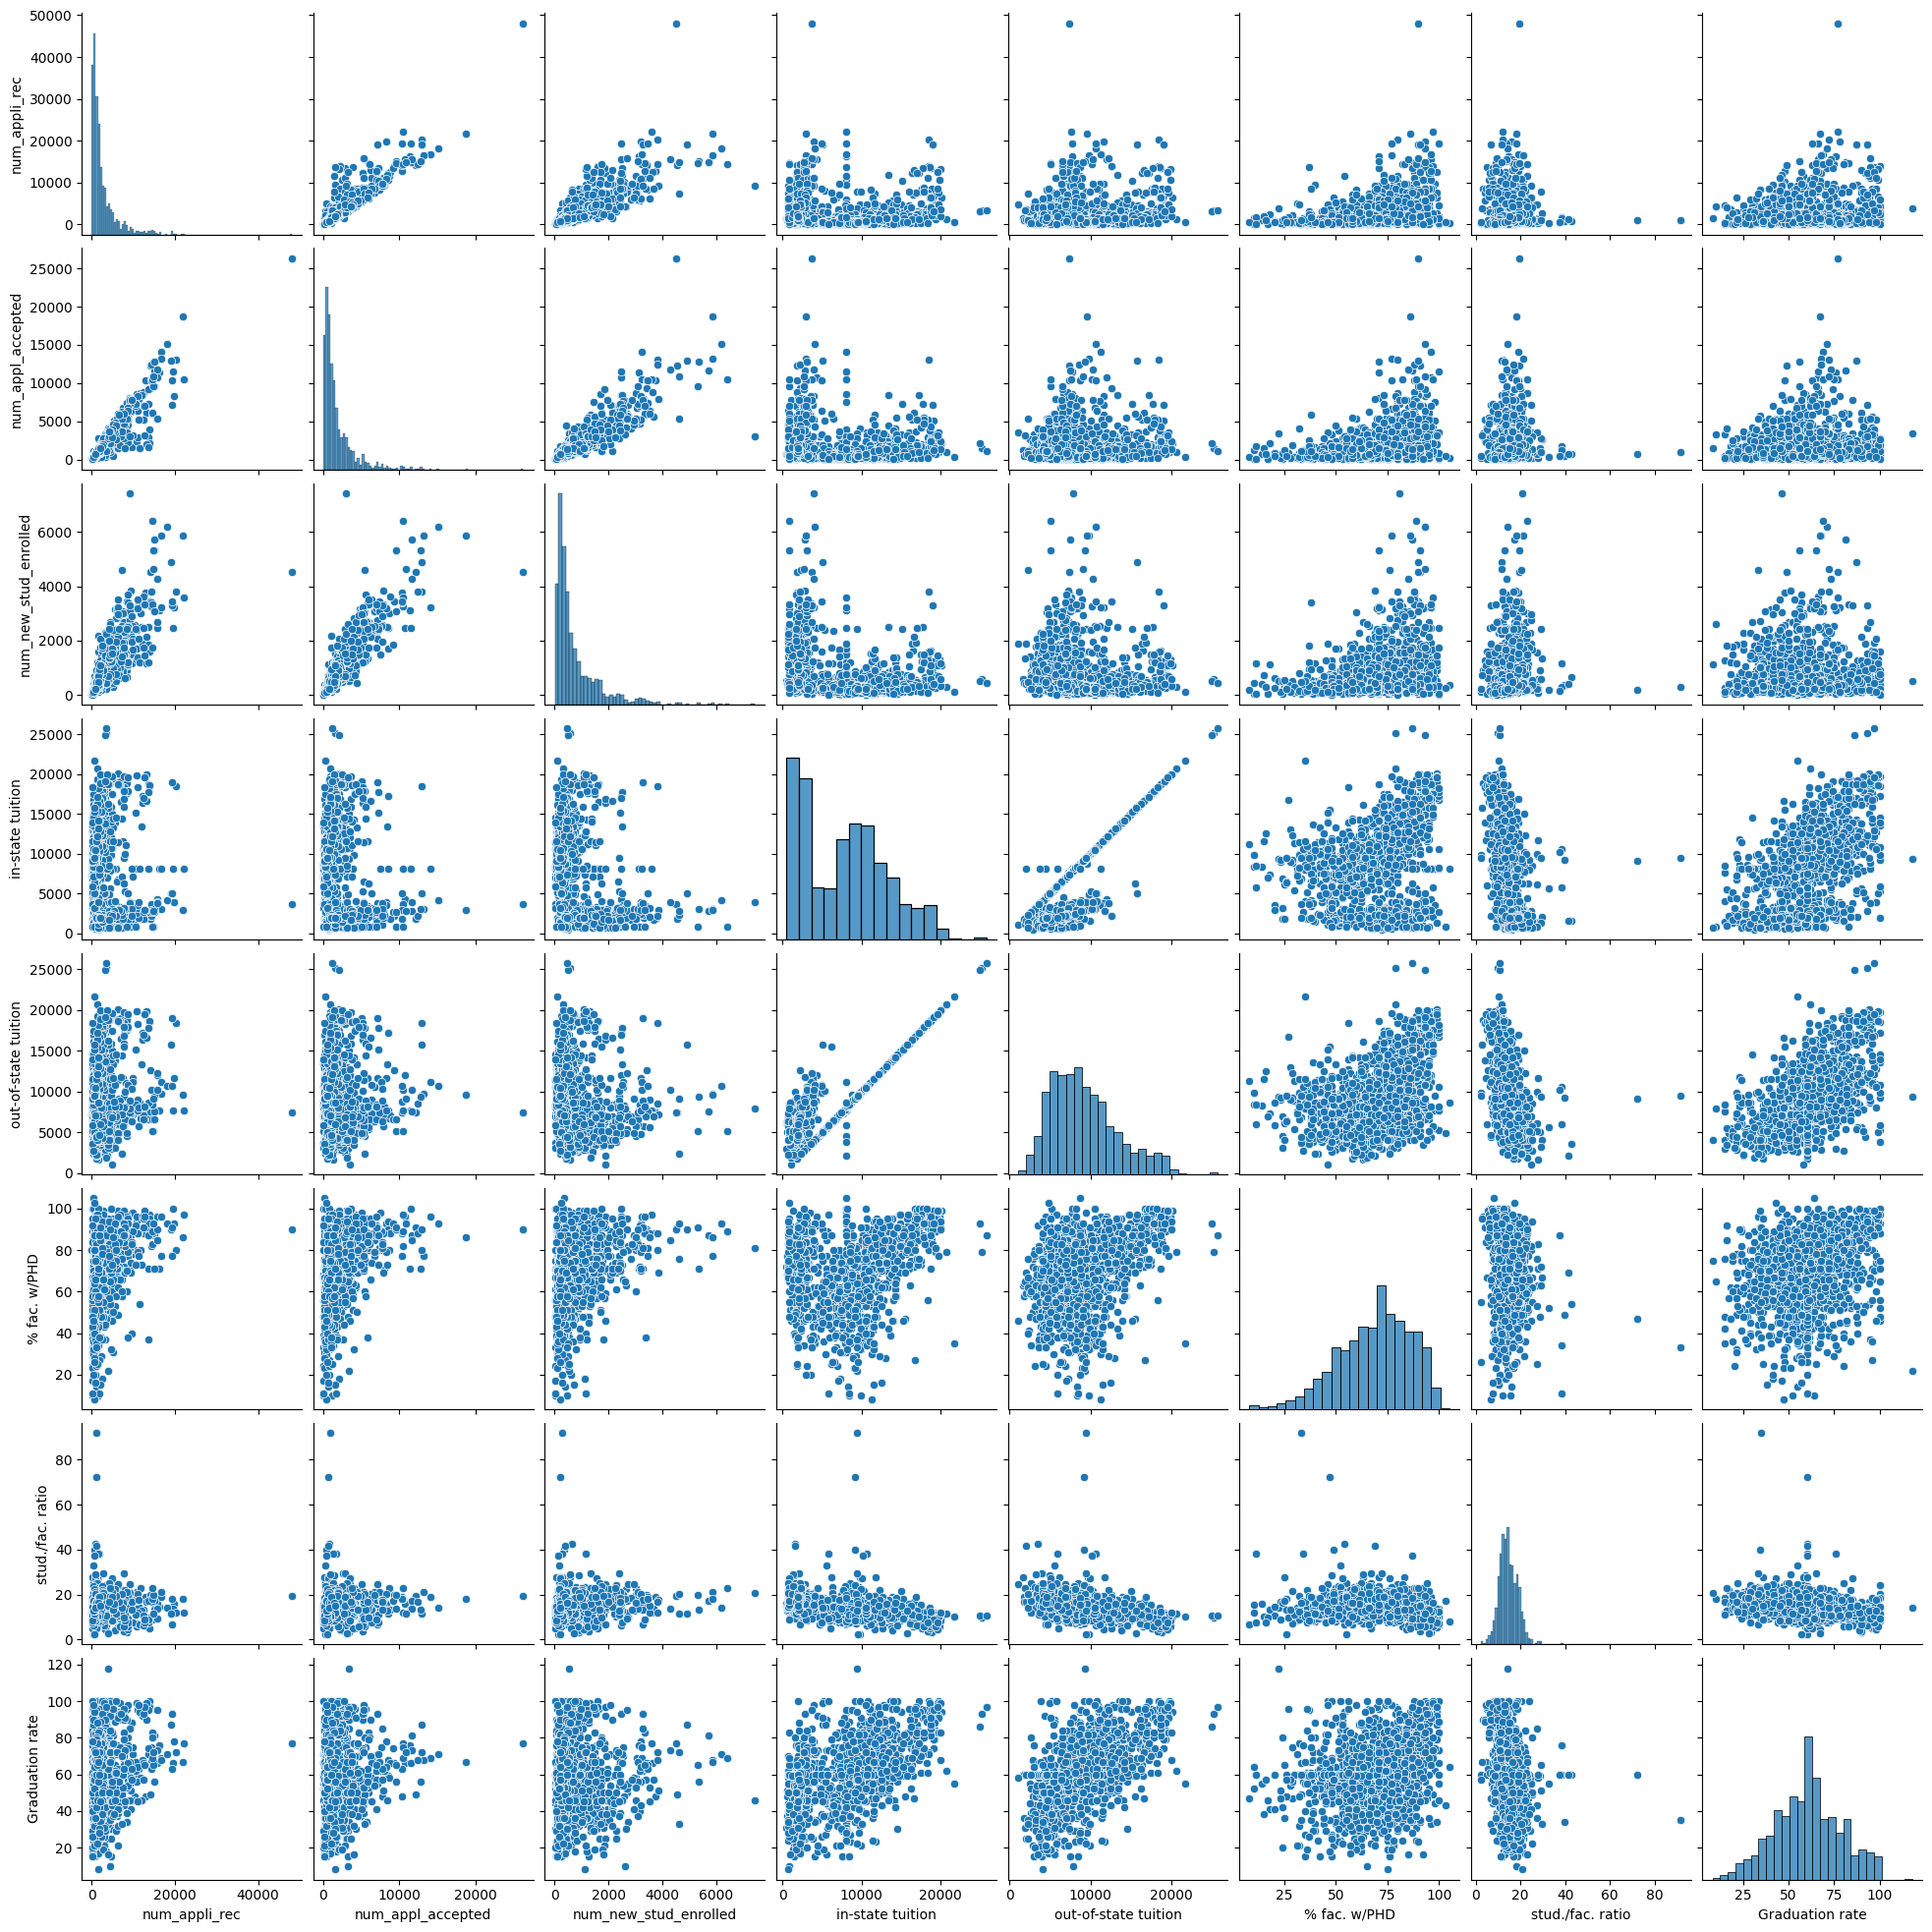

In [21]:
sns.pairplot(uni_df)

In [23]:
contingency_tbl = pd.crosstab(adult_df.income, adult_df.sex)
contingency_tbl

sex,Female,Male
income,,
<=50K,9592,15128
>50K,1179,6662


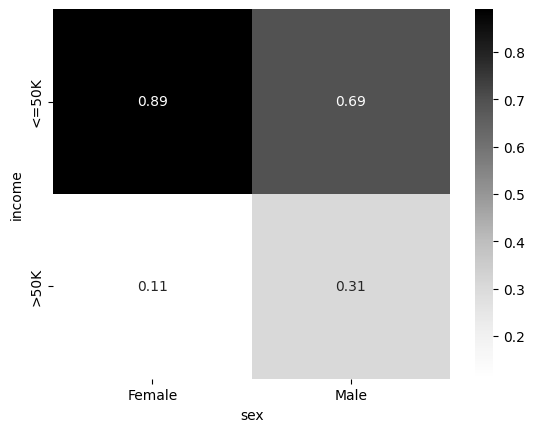

In [24]:
probability_tbl = contingency_tbl/contingency_tbl.sum()
sns.heatmap(probability_tbl, annot=True, center=0.5, cmap='Greys')
plt.show()

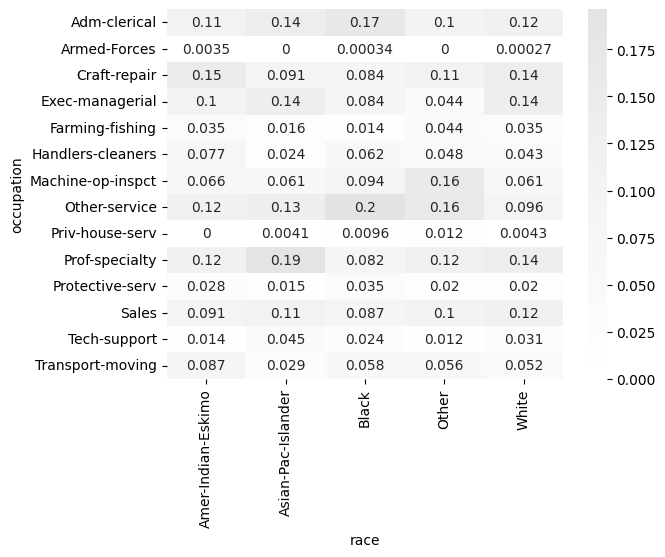

In [29]:
contingency_tbl = pd.crosstab(adult_df['occupation'], adult_df['race'])
probability_tbl = contingency_tbl/contingency_tbl.sum()
sns.heatmap(probability_tbl, annot=True, center=0.5, cmap='Greys')
plt.show()

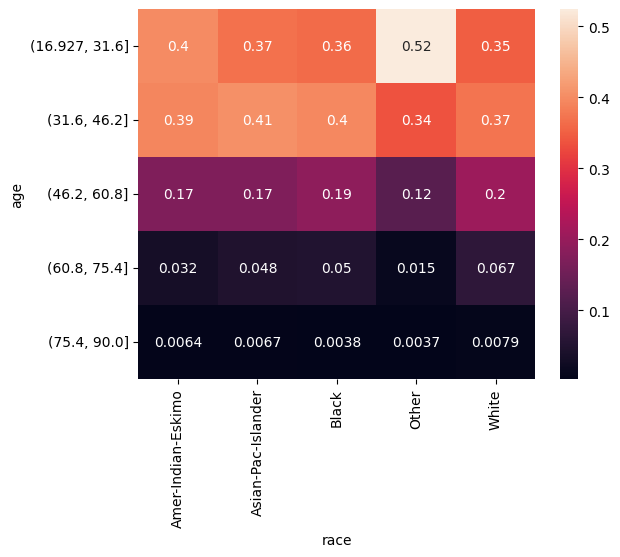

In [32]:
age_discretized = pd.cut(adult_df.age, bins=5)
contingency_tbl = pd.crosstab(age_discretized, adult_df.race)
probability_tbl = contingency_tbl/contingency_tbl.sum()
sns.heatmap(probability_tbl, annot=True)
plt.show()

In [33]:
adult_df.groupby(['education','education-num']).size()

education     education-num
10th          6                  933
11th          7                 1175
12th          8                  433
1st-4th       2                  168
5th-6th       3                  333
7th-8th       4                  646
9th           5                  514
Assoc-acdm    12                1067
Assoc-voc     11                1382
Bachelors     13                5355
Doctorate     16                 413
HS-grad       9                10501
Masters       14                1723
Preschool     1                   51
Prof-school   15                 576
Some-college  10                7291
dtype: int64

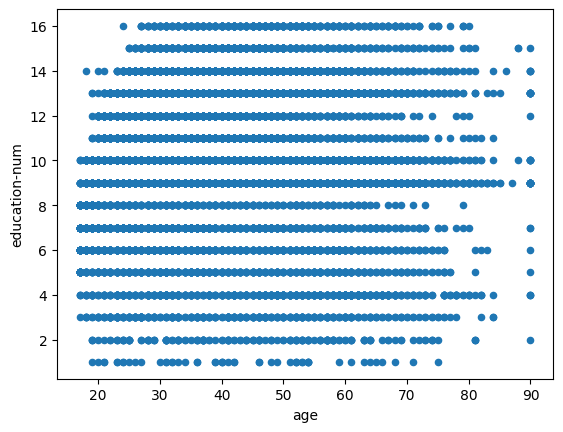

In [34]:
adult_df.plot.scatter(x='age', y='education-num')
plt.show()

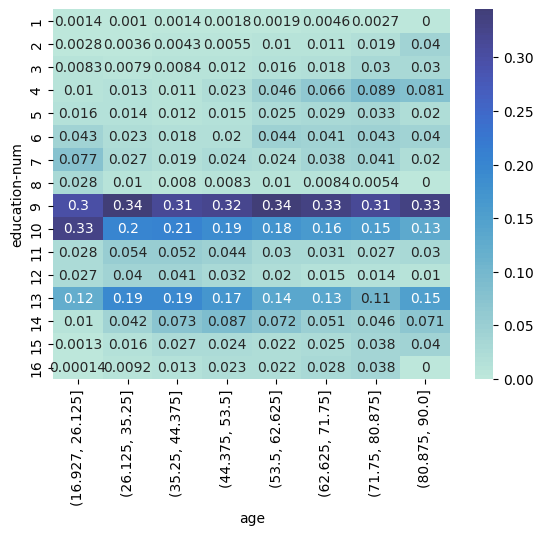

In [36]:
age_discretized = pd.cut(adult_df['age'], bins=8)
contingency_tbl = pd.crosstab(adult_df['education-num'], age_discretized)
probability_tbl = contingency_tbl/contingency_tbl.sum()
sns.heatmap(probability_tbl, annot=True, center=0.5)
plt.show()

In [38]:
country_df = pd.read_csv('WH Report_preprocessed.csv')

In [39]:
country_df.head()

,Name,Continent,year,population,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,Asia,2010,29185507.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
1,Afghanistan,Asia,2011,30117413.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
2,Afghanistan,Asia,2012,31161376.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
3,Afghanistan,Asia,2013,32269589.0,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
4,Afghanistan,Asia,2014,33370794.0,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375


In [41]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Name                              1220 non-null   object 
 1   Continent                         1220 non-null   object 
 2   year                              1220 non-null   int64  
 3   population                        1220 non-null   float64
 4   Life_Ladder                       1220 non-null   float64
 5   Log_GDP_per_capita                1220 non-null   float64
 6   Social_support                    1220 non-null   float64
 7   Healthy_life_expectancy_at_birth  1220 non-null   float64
 8   Freedom_to_make_life_choices      1220 non-null   float64
 9   Generosity                        1220 non-null   float64
 10  Perceptions_of_corruption         1220 non-null   float64
 11  Positive_affect                   1220 non-null   float64
 12  Negati

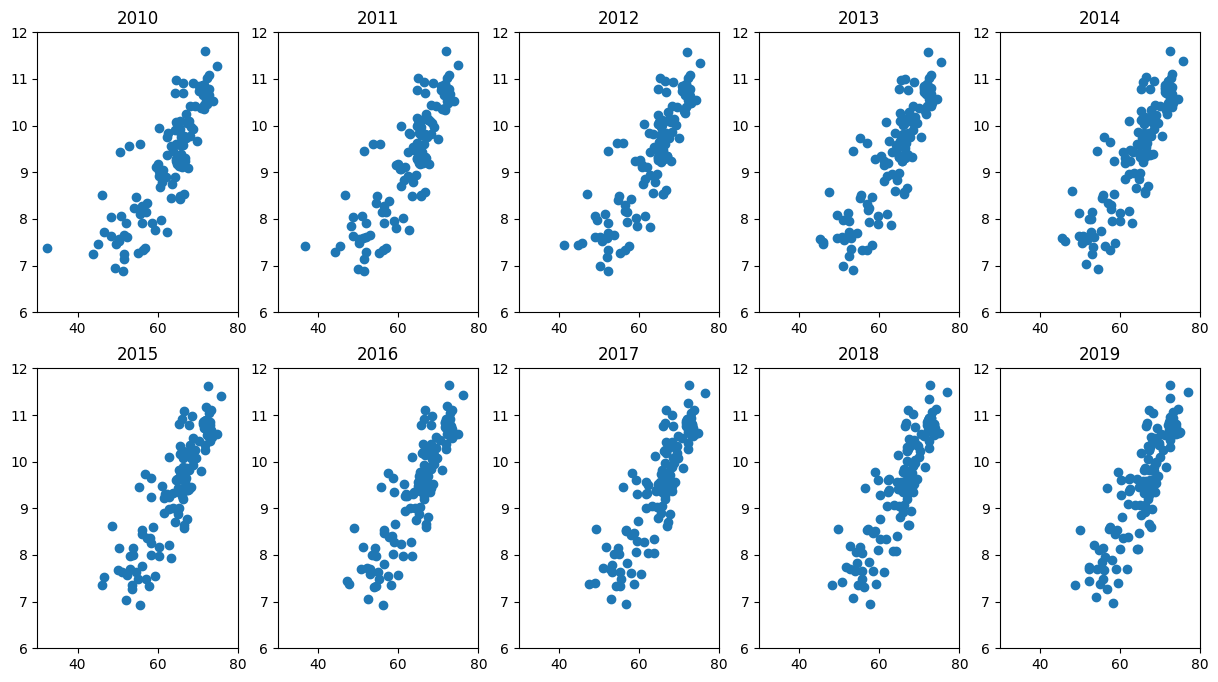

<Figure size 640x480 with 0 Axes>

In [45]:
plt.figure(figsize=(15,8))
year_poss = country_df['year'].unique()
for i, yr in enumerate(year_poss):
    BM = country_df['year']== yr
    x = country_df[BM]['Healthy_life_expectancy_at_birth']
    y = country_df[BM]['Log_GDP_per_capita']
    plt.subplot(2,5,i+1)
    plt.scatter(x,y)
    plt.title(yr)
    plt.xlim([30,80])
    plt.ylim([6,12])
plt.show()
plt.tight_layout()

In [43]:
year_poss

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

In [46]:
def plotyear(year):
    BM = country_df['year'] == year
    x = country_df[BM]['Healthy_life_expectancy_at_birth']
    y = country_df[BM]['Log_GDP_per_capita']
    plt.scatter(x,y)
    plt.xlabel('Healthy life expectancy at birth')
    plt.ylabel('Lof GDP per capita')
    plt.xlim([30,80])
    plt.ylim([6,12])
    plt.show()

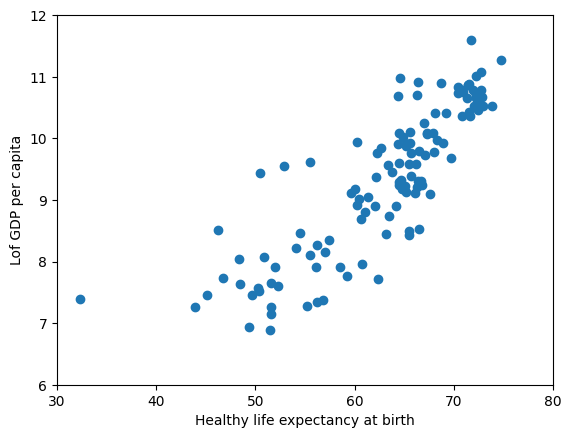

In [47]:
plotyear(2010)

In [49]:
from ipywidgets import interact, widgets
interact(plotyear, year=widgets.
IntSlider(min=2010,max=2019, step=1, value=2010))

interactive(children=(IntSlider(value=2010, description='year', max=2019, min=2010), Output()), _dom_classes=(…

<function __main__.plotyear(year)>

In [64]:
continent_poss = country_df['Continent'].unique()
colors_dic={'Asia':'b', 'Europe':'g', 'Africa':'r',
            'South America':'c', 'Oceania':'m',
            'North America':'y', 'Antarctica':'k'}
def plotyear(year):
    for continent in continent_poss:
        # BM1 and BM2 are filters
        BM1 = (country_df['year']==year)
        BM2 = (country_df['Continent']== continent)
        BM = BM1 & BM2
        x = country_df[BM]['Healthy_life_expectancy_at_birth']
        y = country_df[BM]['Log_GDP_per_capita']
        plt.scatter(x,y, c=colors_dic[continent], marker='o',
                    linewidth=0.5, edgecolors='w', label=continent)
    plt.xlabel('Healthy life expectancy at birth')
    plt.ylabel('Log GDP per capita')
    plt.xlim([30,80])
    plt.ylim([6,12])
    plt.legend()
    plt.show()
interact(plotyear, year=widgets.
IntSlider(min=2010, max=2019, step=1, value=2010))

interactive(children=(IntSlider(value=2010, description='year', max=2019, min=2010), Output()), _dom_classes=(…

<function __main__.plotyear(year)>

In [67]:
continent_poss = country_df['Continent'].unique()
colors_dic={'Asia':'b', 'Europe':'g', 'Africa':'r',
            'South America':'c', 'Oceania':'m',
            'North America':'y', 'Antarctica':'k'}
country_df.sort_values(['population'], inplace = True, ascending=False)
def plotyear(year):
    for continent in continent_poss:
        # BM1 and BM2 are filters
        BM1 = (country_df['year']==year)
        BM2 = (country_df['Continent']== continent)
        BM = BM1 & BM2
        size = country_df[BM]['population']/200000
        x = country_df[BM]['Healthy_life_expectancy_at_birth']
        y = country_df[BM]['Log_GDP_per_capita']
        plt.scatter(x,y, c=colors_dic[continent], marker='o', s = size,
                    linewidth=0.5, edgecolors='w', label=continent)
    plt.xlabel('Healthy life expectancy at birth')
    plt.ylabel('Log GDP per capita')
    plt.xlim([30,80])
    plt.ylim([6,12])
    plt.legend(markerscale=0.5)
    plt.show()
interact(plotyear, year=widgets.
IntSlider(min=2010, max=2019, step=1, value=2010))

interactive(children=(IntSlider(value=2010, description='year', max=2019, min=2010), Output()), _dom_classes=(…

<function __main__.plotyear(year)>

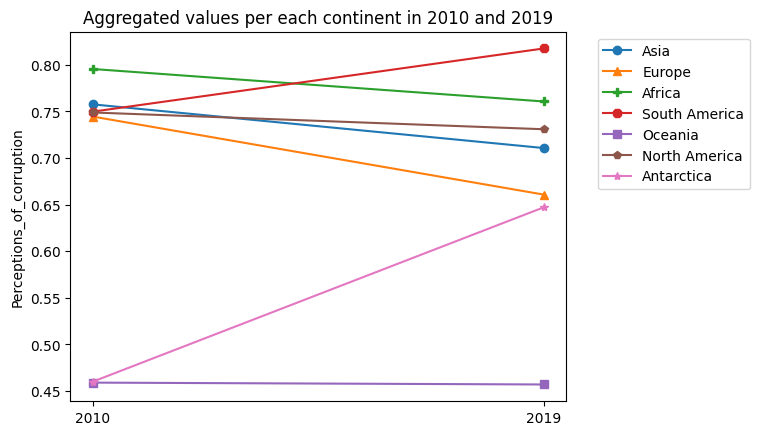

In [74]:
country_df = pd.read_csv('WH Report_preprocessed.csv')
continent_poss = country_df['Continent'].unique()
byContinentYear = country_df.groupby(['Continent','year'])['Perceptions_of_corruption'].mean()
marker_options = ['o','^','P','8','s','p','*']
for i,c in enumerate(continent_poss):
    plt.plot([2010,2019], byContinentYear.loc[c,[2010,2019]],
             label=c, marker=marker_options[i])
plt.xticks([2010,2019])
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Aggregated values per each continent in 2010 and 2019')
plt.ylabel('Perceptions_of_corruption')
plt.show()

In [78]:
byContinentYear.loc[:,[2010,2019]]

Continent      year
Africa         2010    0.795433
               2019    0.760600
Antarctica     2010    0.460000
               2019    0.647000
Asia           2010    0.757500
               2019    0.710643
Europe         2010    0.744415
               2019    0.660707
North America  2010    0.748800
               2019    0.730800
Oceania        2010    0.459000
               2019    0.457000
South America  2010    0.749667
               2019    0.817444
Name: Perceptions_of_corruption, dtype: float64